# Image Classification System Pjct

##### The dataset is composed of dog and cat photos provided as a subset of photos from a much larger collection of 3 million manually annotated photos. This data was obtained through a collaboration between Petfinder.com and Microsoft.

## Step 1

In [ ]:
import pandas as pd
total_data = pd.read_csv("../data/raw/sampleSubmission.csv")
total_data.head()

In [2]:
import zipfile
import os

train_zip_path = "../data/raw/train.zip"
test_zip_path = "../data/raw/test1.zip"
interim_train_path = "../data/interim/train/"
interim_test_path = "../data/interim/test/"

#Extract training and testing datasets
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(interim_train_path)
print(f"Training data extracted to {interim_train_path}")

with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(interim_test_path)
print(f"Test data extracted to {interim_test_path}")

Training data extracted to ../data/interim/train/
Test data extracted to ../data/interim/test/


In [3]:
#Check interim train folder
interim_train_path = "../data/interim/train/"

#Check file
print("Files in interim/train:", os.listdir(interim_train_path)[:10]) 

Files in interim/train: ['train']


In [4]:
interim_train_path = "../data/interim/train/train/"

In [5]:
import shutil
processed_train_path = "../data/processed/train/"
os.makedirs(processed_train_path + "dogs", exist_ok=True)
os.makedirs(processed_train_path + "cats", exist_ok=True)

#Moving images from interim/train to processed/train
for file in os.listdir(interim_train_path): #Iterate through all files in interim/train
    if "dog" in file:  
        shutil.move(os.path.join(interim_train_path, file), 
                    os.path.join(processed_train_path + "dogs", file))
    elif "cat" in file:  
        shutil.move(os.path.join(interim_train_path, file), 
                    os.path.join(processed_train_path + "cats", file))

print("Training images organized into dogs and cats!")

Training images organized into dogs and cats!


### Count files in folder

In [6]:
def count_files(folder):
    return len(os.listdir(folder))

print(f"Dogs in training: {count_files(processed_train_path + 'dogs')}")
print(f"Cats in training: {count_files(processed_train_path + 'cats')}")

Dogs in training: 12500
Cats in training: 12500


## Step 2: Visualize the input information

2024-11-28 23:46:08.022237: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 23:46:08.309847: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-28 23:46:08.463135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732837568.763460    8557 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732837568.855598    8557 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 23:46:09.473615: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

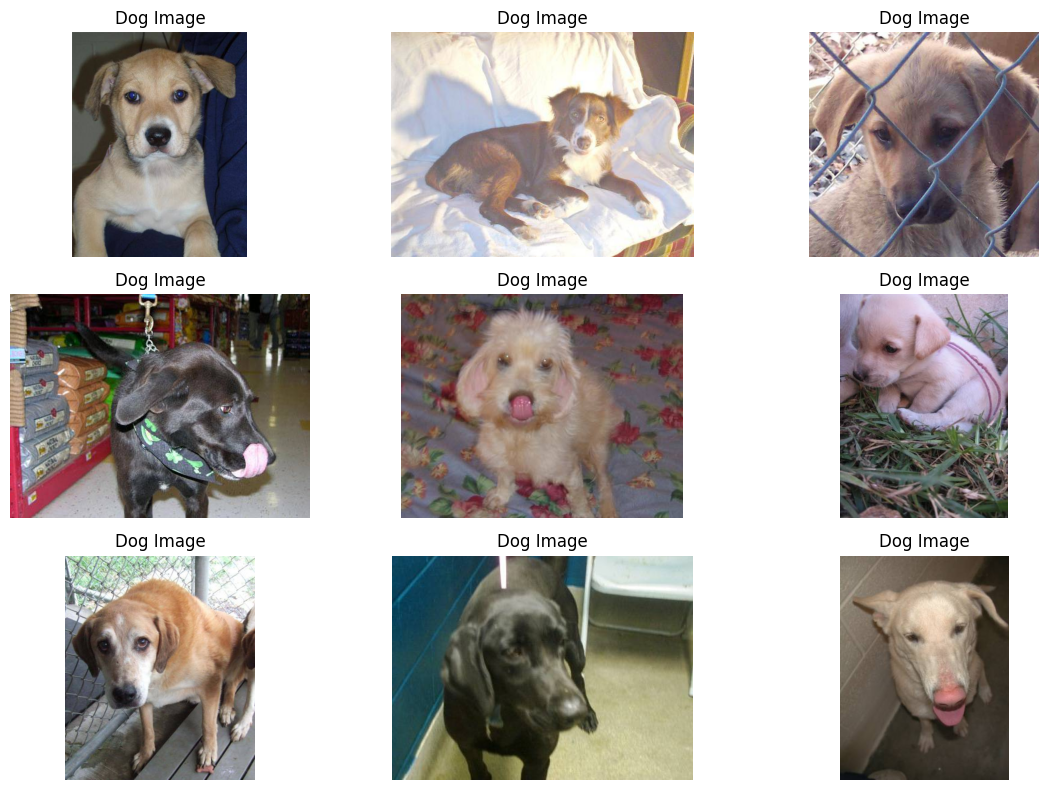

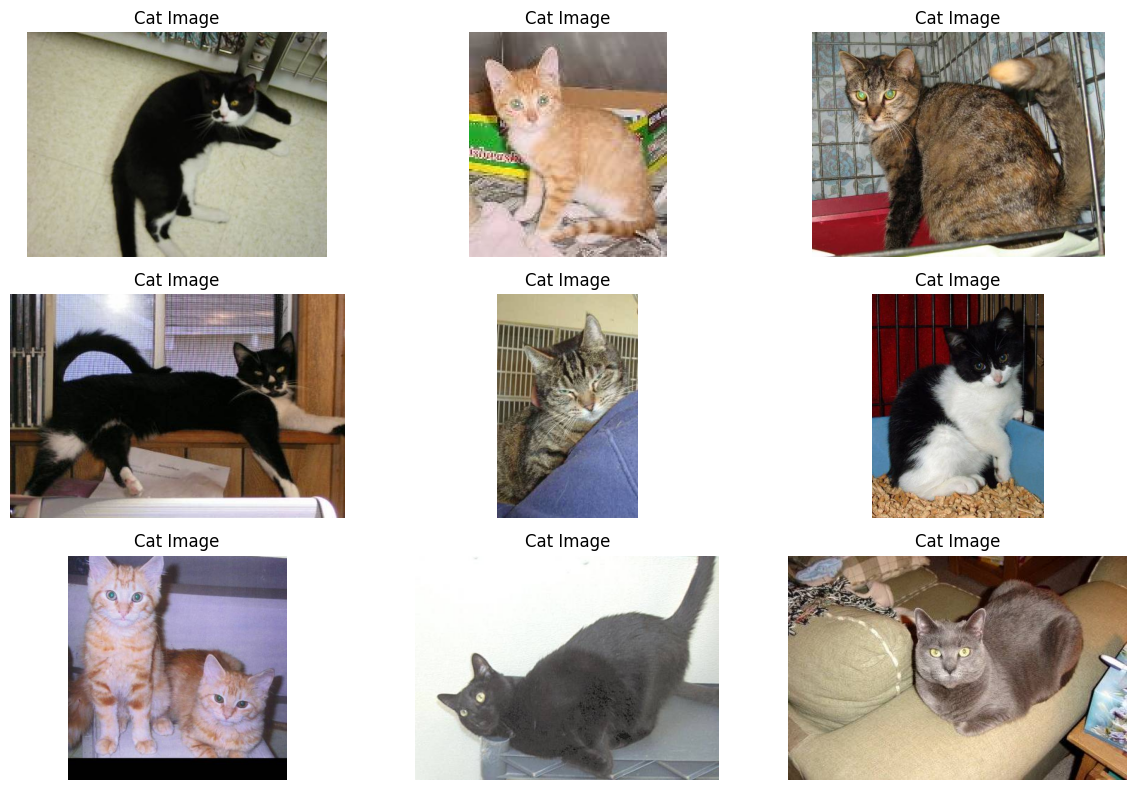

In [7]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

dogs_path = "../data/processed/train/dogs/"
cats_path = "../data/processed/train/cats/"

def visualize_images(folder, title):
    files = os.listdir(folder)[:9]  
    plt.figure(figsize=(12, 8))  
    
    for i, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = load_img(img_path) 
        plt.subplot(3, 3, i + 1)  
        plt.imshow(img)  
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_images(dogs_path, "Dog Image")

visualize_images(cats_path, "Cat Image")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

train_dir = "../data/processed/train/"

datagen = ImageDataGenerator(rescale=1.0/255.0) #Normalize to 1-0

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Ensure this matches the model's input shape
    batch_size=16,
    class_mode="binary"
)


Found 25000 images belonging to 2 classes.


## Train the model

In [6]:
# Importar librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(input_shape=(200, 200, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-28 23:55:40.118133: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    20,480,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,499,649 (78.20 MB)

 Trainable params: 20,499,649 (78.20 MB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [ ]:
history = model.fit(
    train_data, 
    steps_per_epoch=1,           
    epochs=1, #Train for only 1 epoch
    verbose=1 #Show training progress
)

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6824


In [8]:
loss, accuracy = model.evaluate(train_data)
print(f"Training Accuracy: {accuracy * 100:}%")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 274s 175ms/step - accuracy: 0.4969 - loss: 1.2279
Training Accuracy: 50.0%


## Save model

In [10]:
from keras.callbacks import ModelCheckpoint

model_save_path = "model_dogs_vs_cats.keras"

#best model
checkpoint = ModelCheckpoint(model_save_path, monitor='accuracy', save_best_only=True, verbose=1)

model.save(model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at model_dogs_vs_cats.keras


## Load the Model for Predictions

In [11]:
from keras.models import load_model

# Load the saved model
model = load_model(model_save_path)
print("Model loaded successfully.")

Model loaded successfully.


### Load a new image

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

image_path = "../data/processed/train/dogs/dog.1.jpg"  #Existing image

#Preprocess the image
img = load_img(image_path, target_size=(200, 200)) 
img_array = img_to_array(img) / 255.0  #Normalize to [0, 1]
img_array = np.expand_dims(img_array, axis=0)  #Add batch dimension

#Make the prediction
prediction = model.predict(img_array)
class_label = "Dog" if prediction[0] > 0.5 else "Cat"

print(f"Predicted class: {class_label} (Confidence: {prediction[0][0]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
Predicted class: Cat (Confidence: 0.11)
